In [19]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

In [23]:
y_train.shape

(60000,)

In [24]:
y_test.shape

(10000,)

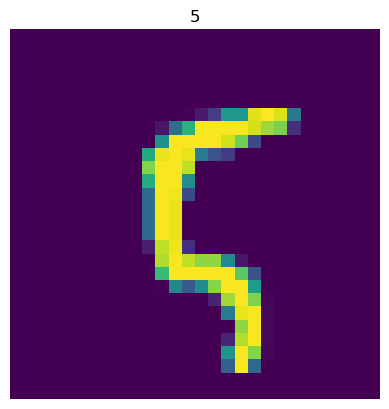

In [27]:
plot_image(x_train , y_train , 100)

In [28]:
(x_train.shape , y_train.shape)

((60000, 28, 28), (60000,))

In [39]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [40]:
# converting range of images to [0,1] by normalization

In [41]:
x_train = x_train/255

In [42]:
x_test = x_test/255

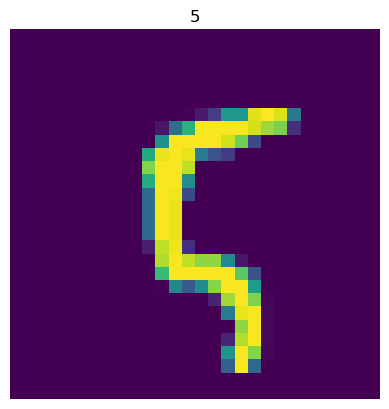

In [43]:
plot_image(x_train, y_train, 100)

In [44]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [45]:
model = Sequential([
    # Input layer for CNN
    layers.Conv2D(64,(3,3), activation='relu',input_shape=x_train[0].shape), # hidden layer
    layers.MaxPool2D((2,2)), 
    
    layers.Conv2D(32,(3,3), activation='relu'),# hidden layer
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(32,(3,3), activation='relu'), # Feature map
    
    layers.Flatten(), # Before Feeding the outputs of CNN to ANN,
                      # we need to flatten it
    
    layers.Dense(units=64,activation = 'relu'), # hidden layer
    layers.Dense(units=32,activation = 'relu'), # hidden layer
    
    layers.Dense(units=10,activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,258 (192.41 KB)

 Trainable params: 49,258 (192.41 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9825 - loss: 0.0563 - val_accuracy: 0.9784 - val_loss: 0.0718
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9837 - loss: 0.0510 - val_accuracy: 0.9804 - val_loss: 0.0709
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9839 - loss: 0.0468 - val_accuracy: 0.9787 - val_loss: 0.0726
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9857 - loss: 0.0451 - val_accuracy: 0.9794 - val_loss: 0.0708
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9867 - loss: 0.0411 - val_accuracy: 0.9791 - val_loss: 0.0831
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9868 - loss: 0.0397 - val_accuracy: 0.9788 - val_loss: 0.0722
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9871 - loss: 0.0383 - val_accuracy: 0.9808 - val_loss: 0.0707
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9883 - loss: 0.0352 - 

In [51]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9778 - loss: 0.0742
Test accuracy: 98.30%


In [52]:
prediction = model.predict(x_test)
prediction_labels = np.argmax(prediction , axis = 1) # converts the predicted probability to class labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [55]:
def predict(image, label , index):
    pred = model.predict(image[index].reshape(1,28,28,1))
    pred_label = np.argmax(pred , axis = 1)[0]
    plt.imshow(image[index])
    plt.axis('off')
    plt.show()
    print("Original Label :", label[index])
    print("Prediction :" , pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


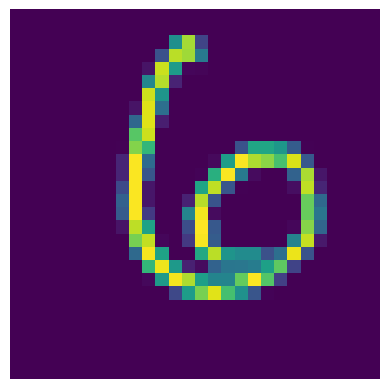

Original Label : 6
Prediction : 6


In [57]:
predict(x_test , y_test , 100)